In [1]:
# #Imports
# import pandas as pd

In [2]:
# #Global path
# pre_path = "C:\\Users\\millen11\\Dropbox\\PC\\Documents\\academia\\rpi\\classes\\fall23\\introToML\\introToMLapps\\project\\dataset\\cleaned\\"

In [3]:
# #Read in external facing indices
# ecpi_df = pd.read_csv(pre_path + "ecpi_df.csv")
# ccpi_df = pd.read_csv(pre_path + "ccpi_df.csv")
# epsi_df = pd.read_csv(pre_path + "epsi_df.csv")
# gscpi_df = pd.read_csv(pre_path + "gscpi_df.csv")

# #Merge ecpi and ccpi
# ecpi_ccpi_df = pd.merge(ecpi_df, ccpi_df, on = ["Date","Country"], how = "inner")
# display(ecpi_ccpi_df)

# #Merge ecpi + ccpi and epsi
# epsi_ecpi_ccpi_df = pd.merge(epsi_df, ecpi_ccpi_df, on = ["Date","Country"], how = "outer")

# #Merge ecpi + ccpi + epsi and gscpi
# external_factors_df = pd.merge(epsi_ecpi_ccpi_df, gscpi_df, on = ["Date"], how = "inner")
# display(external_factors_df)
# # display(external_factors_df.loc[external_factors_df["GSCPI"].isna()]) #confirming there are no NaNs in GSCPI

,Date,Country,ECPI,CCPI
0,2010-01-31,Austria,91.9,89.0
1,2010-01-31,Belgium,88.8,91.3
2,2010-01-31,Bulgaria,12552.9,96.2
3,2010-01-31,Belarus,12.3,96.1
4,2010-01-31,Brazil,73.2,5522618.8
...,...,...,...,...
14084,2023-03-31,Uganda,132.0,126.7
14085,2023-03-31,Uganda,132.0,126.1
14086,2023-03-31,Ukraine,713.9,341.8
14087,2023-03-31,United States,137.6,126.1


,Country,EPSI,Date,ECPI,CCPI,GSCPI
0,Greece,6.000000,2010-01-31,68.3,99.6,-0.30
1,Greece,0.000000,2010-01-31,68.3,99.6,-0.30
2,Greece,2.000000,2010-01-31,68.3,99.6,-0.30
3,Greece,2.611111,2010-01-31,68.3,99.6,-0.30
4,Greece,5.000000,2010-01-31,68.3,99.6,-0.30
...,...,...,...,...,...,...
17620,Uganda,NaN,2023-03-31,132.0,126.7,-1.18
17621,Uganda,NaN,2023-03-31,132.0,126.1,-1.18
17622,Ukraine,NaN,2023-03-31,713.9,341.8,-1.18
17623,United States,NaN,2023-03-31,137.6,126.1,-1.18


In [4]:
# #Sidenote: Potential contextualization of missing data points
# external_indices = pd.merge(epsi_df, ecpi_ccpi_df, on = ["Date","Country"], how = "outer")
# null_df = external_indices.loc[external_indices["CCPI"].isnull()]
# display(null_df)
# print(set(null_df["Country"]))

# '''
# Based on the above data, there is 7 countries that do not have ECPI's or CCPI's in 2010. Given this, 
# I believe a potential reason for this is said countries wanting to withold these consumer economic facing indices
# post recession to potentially save face. Additionally, many of these countries are oftentimes viewed as extremely stringent
# on how they're percieved and what sort of information they release. Again, there is no gurantee, that either of these things could be
# the reason for these NaNs, but just a thought.
# '''

,Country,EPSI,Date,ECPI,CCPI
3553,Australia,0.00,2010-01-31,NaN,NaN
3554,Australia,3.00,2010-01-31,NaN,NaN
3555,Australia,4.75,2010-01-31,NaN,NaN
3556,Australia,0.00,2010-01-31,NaN,NaN
3557,Australia,0.00,2010-01-31,NaN,NaN
...,...,...,...,...,...
6183,India,0.00,2010-01-31,NaN,NaN
6184,India,5.00,2010-01-31,NaN,NaN
6185,India,1.00,2010-01-31,NaN,NaN
6186,India,2.00,2010-01-31,NaN,NaN


{'India', 'Korea', 'Australia', "China (People's Republic of)", 'Türkiye', 'Russia', 'Slovak Republic'}


"\nBased on the above data, there is 7 countries that do not have ECPI's or CCPI's in 2010. Given this, \nI believe a potential reason for this is said countries wanting to withold these consumer economic facing indices\npost recession to potentially save face. Additionally, many of these countries are oftentimes viewed as extremely stringent\non how they're percieved and what sort of information they release. Again, there is no gurantee, that either of these things could be\nthe reason for these NaNs, but just a thought.\n"

In [5]:
'''
The prediction plan --
Process and thinking for dealing with missing values in EPSI, ECPI, and CCPI. Since, I need these features to contextualize
the market and I need data from 2010 to 2023 with as many countries as possible, to maximize scope and generality, I must find a way to
deal with their NaN's to answer our original question (See README.md). So here's the plan:
  1. Deal with EPSI NaNs (O1)
    a. Fill CCPI and ECPI with future datapoints
    b. One-hot encode
    c. Predict EPSI
  2. Use the newlyfound ESPI's to predict the missing CCPI and ECPI values to try to get most accurate results (O2)
    a. One-hot encode
    b. Predict CCPI
    c. Predict ECPI (May benefit from CCPI being filler first, since ECPI derives from CCPI)
  3. Repredict the EPSI values given that our 1100 rows, about 6.4 percent of our data is better represented now (O3)
    a. One-hot encode
    b. Predict EPSI
    
Although this approach is genuinely strange, I feel it is a good solution, since
  1. The 1139/17625 rows of missing CCPI/ECPI values, is at large small. However, I would like to minimize its affect on the EPSI
  since the EPSI values from 2021 to 2023 have more insights to bring.
  2. Using a temporary EPSI that has minimal affect on the these decade old CCPI and ECPI values, gives a more accurate version of what the actual
  EPSI would be like than the general mean, since environmental policy has been rapidly changing nowadays

NOTE:
  Did not realize that EPSI also has nulls pre 2021. However, we will continue with the approach since the EPSI then will not be AS important
'''

"\nThe prediction plan --\nProcess and thinking for dealing with missing values in EPSI, ECPI, and CCPI. Since, I need these features to contextualize\nthe market and I need data from 2010 to 2023 with as many countries as possible, to maximize scope and generality, I must find a way to\ndeal with their NaN's to answer our original question (See README.md). So here's the plan:\n  1. Deal with EPSI NaNs (O1)\n    a. Fill CCPI and ECPI with future datapoints\n    b. One-hot encode\n    c. Predict EPSI\n  2. Use the newlyfound ESPI's to predict the missing CCPI and ECPI values to try to get most accurate results (O2)\n    a. One-hot encode\n    b. Predict CCPI\n    c. Predict ECPI (May benefit from CCPI being filler first, since ECPI derives from CCPI)\n  3. Repredict the EPSI values given that our 1100 rows, about 6.4 percent of our data is better represented now (O3)\n    a. One-hot encode\n    b. Predict EPSI\n    \nAlthough this approach is genuinely strange, I feel it is a good solut

In [6]:
# #Testing data: Data we want predicted
# predict_df = external_factors_df.loc[external_factors_df["EPSI"].isna()]
# display(predict_df)
# print(set(predict_df["Country"]))

,Country,EPSI,Date,ECPI,CCPI,GSCPI
578,Bulgaria,NaN,2010-01-31,12552.9,96.2,-0.30
579,Belarus,NaN,2010-01-31,12.3,96.1,-0.30
580,Chile,NaN,2010-01-31,83.0,87.4,-0.30
581,China,NaN,2010-01-31,89.4,84.4,-0.30
582,Colombia,NaN,2010-01-31,79.6,85.0,-0.30
...,...,...,...,...,...,...
17620,Uganda,NaN,2023-03-31,132.0,126.7,-1.18
17621,Uganda,NaN,2023-03-31,132.0,126.1,-1.18
17622,Ukraine,NaN,2023-03-31,713.9,341.8,-1.18
17623,United States,NaN,2023-03-31,137.6,126.1,-1.18


{'Korea, Rep.', 'Sri Lanka', 'Egypt, Arab Rep.', 'Cyprus', 'Luxembourg', 'Taiwan, China', 'Spain', 'Honduras', 'Norway', 'Guatemala', 'Peru', 'Bulgaria', 'Portugal', 'Japan', 'Nicaragua', 'Netherlands', 'Malaysia', 'United Kingdom', 'Belarus', 'Colombia', 'Hong Kong SAR, China', 'Montenegro', 'Singapore', 'Italy', 'India', 'Croatia', 'Jordan', 'Canada', 'South Africa', 'Malta', 'Dominican Republic', 'Lithuania', 'Turkey', 'United States', 'Uganda', 'Costa Rica', 'Kosovo', 'Iran, Islamic Rep.', 'Russian Federation', 'Albania', 'Lao, PDR', 'China', 'Hungary', 'Moldova, Rep.', 'Mexico', 'Latvia', 'Thailand', 'Switzerland', 'Iraq', 'Iceland', 'Slovenia', 'North Macedonia', 'Chile', 'France', 'Germany', 'El Salvador', 'Ireland', 'Poland', 'Kuwait', 'Mauritius', 'Serbia', 'Paraguay', 'Qatar', 'Czech Republic', 'Chad', 'Ukraine', 'Brazil', 'Finland', 'Austria', 'Nepal', 'Sweden', 'Philippines', 'Indonesia', 'Israel', 'Denmark', 'Slovakia', 'Greece', 'Belgium', 'Estonia', 'Tanzania, United Rep

In [7]:
# #Extrapolate 2021 to 2023 EPSI values
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.neural_network import MLPRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# X = external_factors_df.drop(columns = ["EPSI"])
# y = external_factors_df["EPSI"]

In [8]:
# #Find what model is best for task
# #Filling CCPI and ECPI NaN's with next row/datapoint
# X_ffill = X.fillna(method = "ffill", axis = 0)
# X_train, X_test, y_train, y_test = train_test_split(X_ffill, y, train_size = .7, random_state = 1)

# #Perform one-hot encoding
# X_train_encoded = pd.get_dummies(X_train, columns = ["Country", "Date"])
# display(X_train_encoded)
# X_test_encoded =  pd.get_dummies(X_test, columns = ["Country", "Date"])


# #Temporarily fill NaN EPSI values with the mean EPSI values
# y_train_fill = y_train.fillna(y_train.mean())
# display(y_train_fill)
# y_test_fill = y_test.fillna(y_train.mean())

,ECPI,CCPI,GSCPI,Country_Albania,Country_Australia,Country_Austria,Country_Belarus,Country_Belgium,Country_Brazil,Country_Bulgaria,...,Date_2022-04-30,Date_2022-05-31,Date_2022-06-30,Date_2022-07-31,Date_2022-08-31,Date_2022-09-30,Date_2022-10-31,Date_2023-01-31,Date_2023-02-28,Date_2023-03-31
11837,93.5,101.6,0.08,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9724,97.7,96.8,-0.16,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14982,90.2,109.7,2.54,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7826,94.3,94.9,1.55,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5775,118.7,105.7,0.52,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,101.7,99.7,-0.39,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17289,181.2,122.1,0.91,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
5192,99.3,100.9,0.59,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12172,78.9,83.0,0.10,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


11837    2.640953
9724     2.640953
14982    2.640953
7826     2.640953
5775     3.000000
           ...   
10955    2.640953
17289    2.640953
5192     3.333333
12172    2.640953
235      2.027778
Name: EPSI, Length: 12337, dtype: float64

In [9]:
# #Linear regression
# lin_reg = LinearRegression()
# lin_reg.fit(X_train_encoded, y_train_fill)
# display(X_train_encoded)
# y_pred = lin_reg.predict(X_test_encoded)

# mse = mean_squared_error(y_test_fill, y_pred)
# print(mse)

# print(r2_score(y_test_fill, y_pred)) 

,ECPI,CCPI,GSCPI,Country_Albania,Country_Australia,Country_Austria,Country_Belarus,Country_Belgium,Country_Brazil,Country_Bulgaria,...,Date_2022-04-30,Date_2022-05-31,Date_2022-06-30,Date_2022-07-31,Date_2022-08-31,Date_2022-09-30,Date_2022-10-31,Date_2023-01-31,Date_2023-02-28,Date_2023-03-31
11837,93.5,101.6,0.08,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9724,97.7,96.8,-0.16,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14982,90.2,109.7,2.54,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7826,94.3,94.9,1.55,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5775,118.7,105.7,0.52,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,101.7,99.7,-0.39,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17289,181.2,122.1,0.91,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
5192,99.3,100.9,0.59,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12172,78.9,83.0,0.10,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


1.6089434941748284
0.10037556863132702


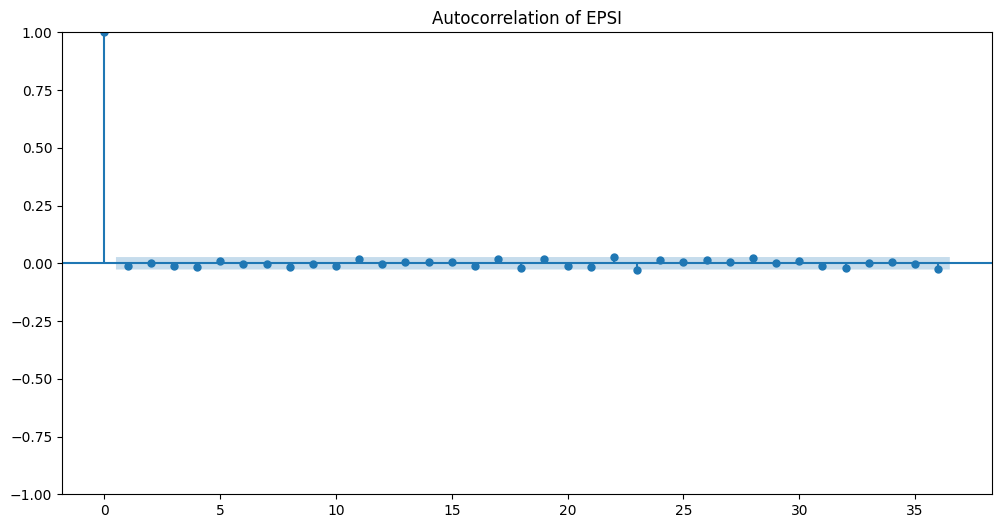

In [10]:
# #Viewing the autocorrelation of EPSI to view the seasonality
# import matplotlib.pyplot as plt
# from statsmodels.graphics.tsaplots import plot_acf

# # Assuming 'data' is your time series data
# Z = external_factors_df.set_index("Date")
# figure, axis = plt.subplots(figsize = (12, 6))
# plot_acf(y_pred, lags = 36, ax = axis)
# plt.title("Autocorrelation of EPSI")
# plt.show()


In [11]:
# #Random Forest regressor
# rfg = RandomForestRegressor(n_estimators = 100, random_state = 1)
# rfg.fit(X_train_encoded, y_train_fill)

# y_pred = rfg.predict(X_test_encoded)

# mse = mean_squared_error(y_test_fill, y_pred)
# print(mse)

# print(r2_score(y_test_fill, y_pred))

1.7055210840120152
0.046375189093575964


In [12]:
# #Gradient Boosting regressor
# gbr = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, random_state = 1)
# gbr.fit(X_train_encoded, y_train_fill)

# y_pred = gbr.predict(X_test_encoded)

# mse = mean_squared_error(y_test_fill, y_pred)
# print(mse)

# print(r2_score(y_test_fill, y_pred))

1.6101231877379494
0.09971595494398855


In [13]:
# #MLP regressor
# mlp = MLPRegressor(max_iter = 100, random_state = 1)
# mlp.fit(X_train_encoded, y_train_fill)

# y_pred = mlp.predict(X_test_encoded)

# mse = mean_squared_error(y_test_fill, y_pred)
# print(mse)

# print(r2_score(y_test_fill, y_pred))

1.7922129575258623
-0.002097692456672684


In [14]:
'''
Since, Linear Regression has performed the best, we will use it to as our NaN prediction model
'''

'\nSince, Linear Regression has performed the best, we will use it to as our NaN prediction model\n'

In [15]:
# def predict_NaN(column_name:str, NaN_df: pd.DataFrame) -> pd.DataFrame: #Predicts NaN values of a given feature
#   encoded_predict_df = pd.get_dummies(NaN_df, columns = ["Country", "Date"])
#   X_predict = encoded_predict_df.drop(columns = [column_name])
#   missing_cols = set(X_train_encoded.columns) - set(X_predict.columns)
#   for col in missing_cols:
#     X_predict[col] = 0 #Add missing column with a temp, 0
#   X_predict = X_predict[X_train_encoded.columns]
#   y_pred = lin_reg.predict(X_predict)
#   predicted_df = NaN_df.copy()
#   predicted_df.loc[predicted_df[column_name].isna(), column_name] = y_pred
#   return predicted_df

In [16]:
# def fill_main_df(column_name: str, predicted_df: pd.DataFrame, filling_df: pd.DataFrame) -> pd.DataFrame: #Fills primary dataframe with respective features missing values
#   predicted_df = predicted_df.reset_index(drop = True)
#   filling_df_indices = filling_df[filling_df[column_name].isna()].index
#   for i, nan_index in enumerate(filling_df_indices):
#     filling_df.loc[nan_index, column_name] = predicted_df.loc[i, column_name]
#   return filling_df
    

In [17]:
# #O1
# predicted_epsi1_df = predict_NaN("EPSI", predict_df) #Predicted EPSI based on temporary ECPI and CCPI values
# # display(predicted_epsi1_df)

# op_df = fill_main_df("EPSI", predicted_epsi1_df, external_factors_df.copy()) #Temporary version of predicted EPSI based on the prediction plan
# # display(op_df)

In [18]:
# #O2
# op2_df = external_factors_df[["CCPI", "ECPI"]] 
# # display(op2_df)
# restored_df = op_df.drop(columns = ["CCPI", "ECPI"])
# restored_df = pd.concat([restored_df, op2_df], axis = 1) #Dataframe with null CCPI and ECPI values and predicted EPSI values 
# # display(restored_df)
# temp_df = restored_df.drop(columns = ["CCPI"])
# temp_ecpi_df = temp_df.fillna(method = "ffill", axis = 0) #Temporarily dealing with NaN ECPI values
# temp_ecpi_df = pd.concat([temp_ecpi_df, restored_df["CCPI"]], axis = 1)
# temp_ecpi_df = temp_ecpi_df.rename(columns = {0: "CCPI"})
# # display(temp_ecpi_df)

# nan_CPI = temp_ecpi_df.loc[temp_ecpi_df["CCPI"].isna()]
# display(nan_CPI)
# predicted_cpi_df = predict_NaN("CCPI", nan_CPI) #Predicted CPI values

# op_df = fill_main_df("CCPI", predicted_cpi_df, op_df)
# display(op_df)

,Country,EPSI,Date,GSCPI,ECPI,CCPI
323,Australia,0.00,2010-01-31,-0.30,99.3,NaN
324,Australia,3.00,2010-01-31,-0.30,99.3,NaN
325,Australia,4.75,2010-01-31,-0.30,99.3,NaN
326,Australia,0.00,2010-01-31,-0.30,99.3,NaN
327,Australia,0.00,2010-01-31,-0.30,99.3,NaN
...,...,...,...,...,...,...
6921,Russia,1.00,2020-01-31,0.09,126.1,NaN
6922,Russia,1.00,2020-01-31,0.09,126.1,NaN
6923,Russia,0.00,2020-01-31,0.09,126.1,NaN
6924,Russia,0.00,2020-01-31,0.09,126.1,NaN


C:\Users\millen11\AppData\Local\Temp\ipykernel_14288\3551782856.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_predict[col] = 0 #Add missing column with a temp, 0
C:\Users\millen11\AppData\Local\Temp\ipykernel_14288\3551782856.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_predict[col] = 0 #Add missing column with a temp, 0
C:\Users\millen11\AppData\Local\Temp\ipykernel_14288\3551782856.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

,Country,EPSI,Date,ECPI,CCPI,GSCPI
0,Greece,6.000000,2010-01-31,68.3,99.6,-0.30
1,Greece,0.000000,2010-01-31,68.3,99.6,-0.30
2,Greece,2.000000,2010-01-31,68.3,99.6,-0.30
3,Greece,2.611111,2010-01-31,68.3,99.6,-0.30
4,Greece,5.000000,2010-01-31,68.3,99.6,-0.30
...,...,...,...,...,...,...
17620,Uganda,2.624270,2023-03-31,132.0,126.7,-1.18
17621,Uganda,2.624270,2023-03-31,132.0,126.1,-1.18
17622,Ukraine,2.625564,2023-03-31,713.9,341.8,-1.18
17623,United States,2.479690,2023-03-31,137.6,126.1,-1.18


In [19]:
# op2_df = op_df.drop(columns = ["ECPI"])
# restored_df = pd.concat([op2_df, op_df["ECPI"]], axis = 1)

# nan_ECPI = restored_df.loc[restored_df["ECPI"].isna()]
# # display(nan_ECPI)
# predicted_ecpi_df = predict_NaN("ECPI", nan_ECPI)

# op_df = fill_main_df("ECPI", predicted_ecpi_df, op_df)
# display(op_df)

C:\Users\millen11\AppData\Local\Temp\ipykernel_14288\3551782856.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_predict[col] = 0 #Add missing column with a temp, 0
C:\Users\millen11\AppData\Local\Temp\ipykernel_14288\3551782856.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_predict[col] = 0 #Add missing column with a temp, 0
C:\Users\millen11\AppData\Local\Temp\ipykernel_14288\3551782856.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

,Country,EPSI,Date,ECPI,CCPI,GSCPI
0,Greece,6.000000,2010-01-31,68.3,99.6,-0.30
1,Greece,0.000000,2010-01-31,68.3,99.6,-0.30
2,Greece,2.000000,2010-01-31,68.3,99.6,-0.30
3,Greece,2.611111,2010-01-31,68.3,99.6,-0.30
4,Greece,5.000000,2010-01-31,68.3,99.6,-0.30
...,...,...,...,...,...,...
17620,Uganda,2.624270,2023-03-31,132.0,126.7,-1.18
17621,Uganda,2.624270,2023-03-31,132.0,126.1,-1.18
17622,Ukraine,2.625564,2023-03-31,713.9,341.8,-1.18
17623,United States,2.479690,2023-03-31,137.6,126.1,-1.18


In [20]:
# #O3
# op_df = op_df.drop(columns = ["EPSI"])
# op_df = pd.concat([op_df, external_factors_df["EPSI"]], axis = 1)
# nan_EPSI = op_df.loc[op_df["EPSI"].isna()]
# display(nan_EPSI)
# predicted_epsi2_df = predict_NaN("EPSI", nan_EPSI)

# external_factors_df = fill_main_df("EPSI", predicted_epsi2_df, op_df)
# display(external_factors_df)

,Country,Date,ECPI,CCPI,GSCPI,EPSI
578,Bulgaria,2010-01-31,12552.9,96.2,-0.30,NaN
579,Belarus,2010-01-31,12.3,96.1,-0.30,NaN
580,Chile,2010-01-31,83.0,87.4,-0.30,NaN
581,China,2010-01-31,89.4,84.4,-0.30,NaN
582,Colombia,2010-01-31,79.6,85.0,-0.30,NaN
...,...,...,...,...,...,...
17620,Uganda,2023-03-31,132.0,126.7,-1.18,NaN
17621,Uganda,2023-03-31,132.0,126.1,-1.18,NaN
17622,Ukraine,2023-03-31,713.9,341.8,-1.18,NaN
17623,United States,2023-03-31,137.6,126.1,-1.18,NaN


,Country,Date,ECPI,CCPI,GSCPI,EPSI
0,Greece,2010-01-31,68.3,99.6,-0.30,6.000000
1,Greece,2010-01-31,68.3,99.6,-0.30,0.000000
2,Greece,2010-01-31,68.3,99.6,-0.30,2.000000
3,Greece,2010-01-31,68.3,99.6,-0.30,2.611111
4,Greece,2010-01-31,68.3,99.6,-0.30,5.000000
...,...,...,...,...,...,...
17620,Uganda,2023-03-31,132.0,126.7,-1.18,2.624270
17621,Uganda,2023-03-31,132.0,126.1,-1.18,2.624270
17622,Ukraine,2023-03-31,713.9,341.8,-1.18,2.625564
17623,United States,2023-03-31,137.6,126.1,-1.18,2.479690


In [21]:
# external_factors_df.to_csv(pre_path + "external_indices.csv", index=False)